# Project 1 - Data Science Blog 

I want to try and answer three questions:

1. Are there any categories that are more successful than others?
2. Is there a better time-scale to raise the appropriate funds, or start time?
3. Can we predict whether a Kickstarter campaign will be successful or not given this data/Are there any key attributes that make a big impact on the outcome? 

In [96]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the data

Extract the data in to a directory called "`data`". This should contain 2 csv files, one of which is used as the dataset for this project: "`ks-projects-201801.csv`"

In [2]:
data_filename = 'data\\ks-projects-201801.csv'

In [3]:
df = pd.read_csv(data_filename)    

## Explore the data

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


<AxesSubplot:xlabel='main_category'>

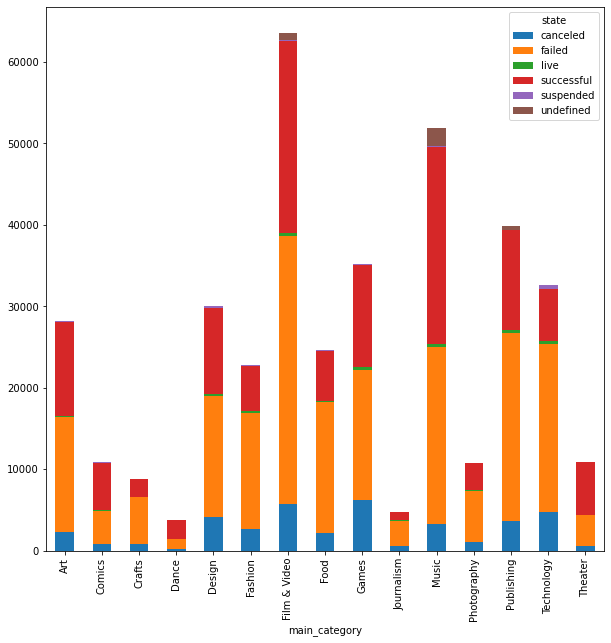

In [7]:
df_cat_states = df.groupby(['main_category', 'state'])['main_category'].count().unstack('state').fillna(0)
df_cat_states.plot(kind='bar', stacked=True, figsize=(10,10))

__So looks like in each of the main categories most campaigns failed...__

### Pledge Goals

Looking at the describe table above the min goal is 0.01 USD and the max goal is 1.663614e+08 USD. This seems high. Lets look at a scatter plot of the goals

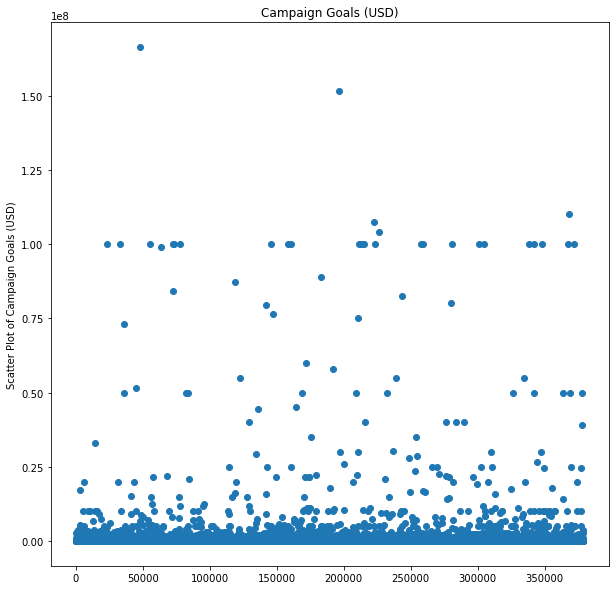

In [8]:
goals = df.usd_goal_real

plt.figure(figsize=(10, 10))
plt.scatter(goals.index, goals)
plt.title("Campaign Goals (USD)")
plt.ylabel("Scatter Plot of Campaign Goals (USD)")
plt.show()

Going by the fact that the mean value is 4.545440e+04 USD, I'll only keep campaigns with a goal below this value. 

In [9]:
df = df[df['usd_goal_real'] <= 4.545440e+04]
df = df.reset_index(drop=True)

## Clean the data

### Check for nulls

In [10]:
df.isna().sum()

ID                     0
name                   3
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3790
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Drop rows with any nulls

In [11]:
df = df.dropna()
df = df.reset_index(drop=True)

### Only Intereseted in "failed" and "successful" Campaigns"

In [12]:
df = df[(df.state == 'successful') | (df.state == 'failed')] 
df = df.reset_index(drop=True)

What's the percentage is each campaigns out of the overall list? 

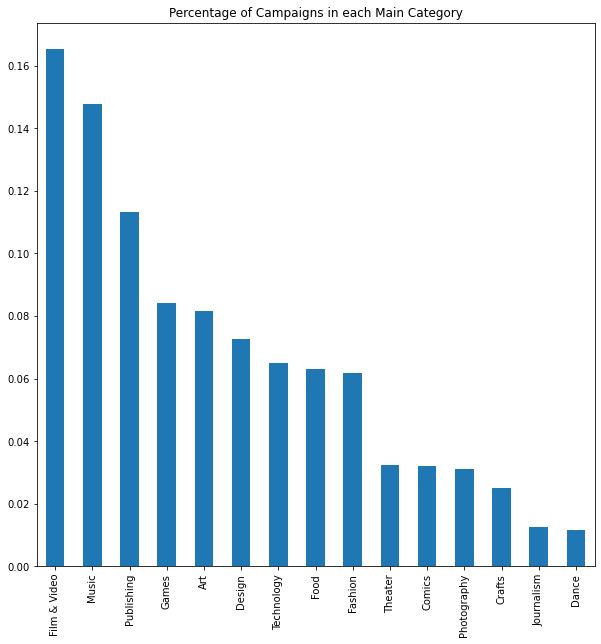

In [13]:
cat_counts = df.main_category.value_counts()
cat_percentages = cat_counts/sum(cat_counts)
cat_percentages.plot(kind='bar', figsize=(10,10))
plt.title("Percentage of Campaigns in each Main Category")
plt.show()

### Split out Launched Date and Time

Split the `launched` column into `launched_date` and `launched_time`:

In [14]:
launched = df.launched

launched_dates = []
launched_times = []
for launch_date_time in launched:
    launched_date, launched_time = launch_date_time.split()
    launched_dates.append(launched_date)
    launched_times.append(launched_time)

In [15]:
df['launched_date'] = launched_dates
df['launched_time'] = launched_times
df = df.drop('launched', axis=1)

### Split the Launch Time into Categories

In [16]:
def time_categorize(time_list):
    """
    Sorts the times into morning, afternoon, evening and night. If there's any
    values that are not converted for some reason they are put into error_list.
    
    error_list should ideally be empty. Also creates a new total list of the 
    categorized times of day. 
    """
    i = 0
    time_of_day = []   # a list of all the times in order
    
    while i < len(time_list):
        time = time_list[i]
        
        if time < '12:00:00' and time >= '05:00:00':
            time_of_day.append('Morning')
            
        elif time < '17:00:00' and time >= '12:00:00':
            time_of_day.append('Afternoon')
            
        elif time < '21:00:00' and time >= '17:00:00':
            time_of_day.append('Evening')
            
        elif time < '24:00:00' and time >= '21:00:00':
            time_of_day.append('Night')
            
        elif time < '05:00:00' and time >= '00:00:00':
            time_of_day.append('Night')
            
        else:
            time_of_day.append('ERROR')
            
        i += 1
    return time_of_day

In [17]:
launch_time_category = time_categorize(list(df.launched_time))
df['launch_time_category'] = launch_time_category

### Remove other unneccessary columns

In [18]:
df = df.drop(['usd pledged', 'ID', 'pledged', 'goal'], axis=1)

In [19]:
df.head()

,name,category,main_category,currency,deadline,state,backers,country,usd_pledged_real,usd_goal_real,launched_date,launched_time,launch_time_category
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,failed,0,GB,0.0,1533.95,2015-08-11,12:12:28,Afternoon
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,failed,15,US,2421.0,30000.00,2017-09-02,04:43:57,Night
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,failed,3,US,220.0,45000.00,2013-01-12,00:20:50,Night
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,failed,1,US,1.0,5000.00,2012-03-17,03:24:11,Night
4,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,successful,16,US,1205.0,1000.00,2014-12-01,18:30:44,Evening


# 1. Are there any types of projects that are more successful than others?

### First, lets get an idea of the proportion of each main_category and category for all of the campaigns in the data

In [20]:
main_category_df = df[['main_category', 'state']]
category_df = df[['category', 'state']]

In [21]:
main_cat_state_counts = df.groupby(['main_category', 'state']).size()
cat_state_counts = df.groupby(['category', 'state']).size()

In [22]:
main_cat_state_percent_success = {}

for key, state in main_cat_state_counts.keys():
    if key not in main_cat_state_percent_success:
        failed = main_cat_state_counts[key]['failed']
        successful = main_cat_state_counts[key]['successful']
        main_cat_state_percent_success[key] = successful/(failed + successful)

In [23]:
cat_state_percent_success = {}

for key, state in cat_state_counts.keys():
    if key not in cat_state_percent_success:
        failed = cat_state_counts[key]['failed']
        successful = cat_state_counts[key]['successful']
        cat_state_percent_success[key] = successful/(failed + successful)

In [24]:
main_cat_state_percent_success_sorted = sorted(main_cat_state_percent_success.items(), key=operator.itemgetter(1), reverse=True)
cat_state_percent_success_sorted = sorted(cat_state_percent_success.items(), key=operator.itemgetter(1), reverse=True)

In [25]:
main_cat_state_percent_success_sorted[:5]

[('Dance', 0.6673340961098398),
 ('Theater', 0.6591465904450796),
 ('Comics', 0.6001449875724938),
 ('Music', 0.5380331035102297),
 ('Games', 0.4677693127541152)]

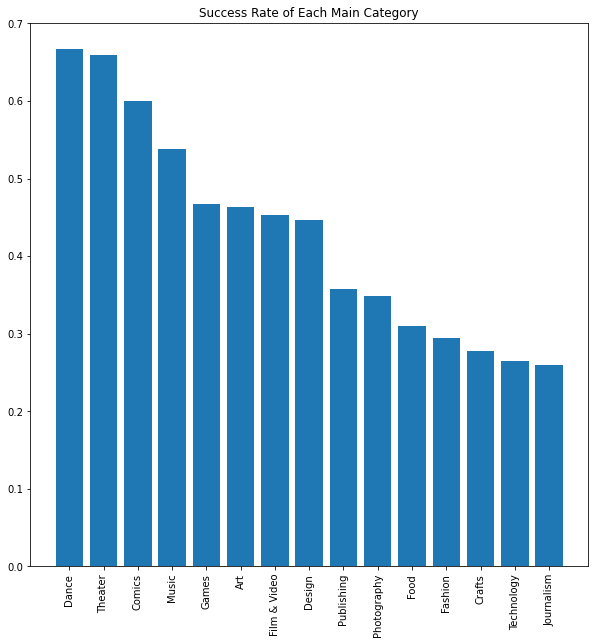

In [26]:
main_cat_ordered, percent_success_ordered = list(zip(*main_cat_state_percent_success_sorted))

plt.figure(figsize=(10,10))
plt.bar(main_cat_ordered, percent_success_ordered)
plt.xticks(rotation=90)
plt.title("Success Rate of Each Main Category")
plt.show()

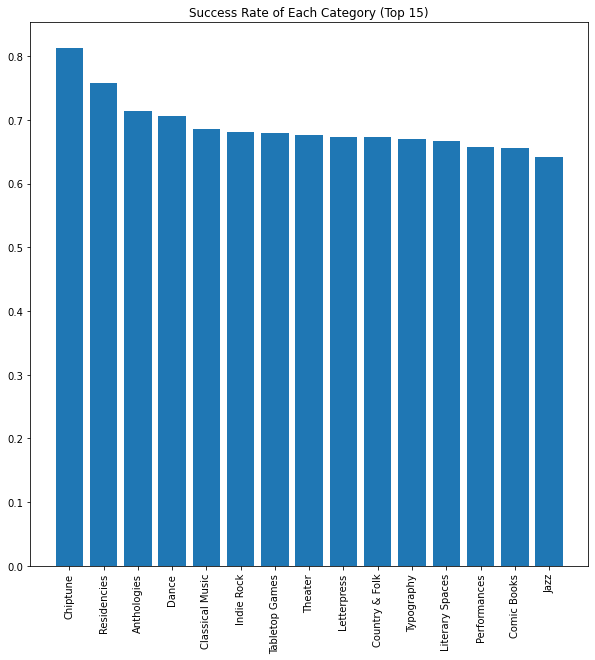

In [27]:
cat_ordered, cat_percent_success_ordered = list(zip(*cat_state_percent_success_sorted))

plt.figure(figsize=(10,10))
plt.bar(cat_ordered[:15], cat_percent_success_ordered[:15])
plt.xticks(rotation=90)
plt.title("Success Rate of Each Category (Top 15)")
plt.show()

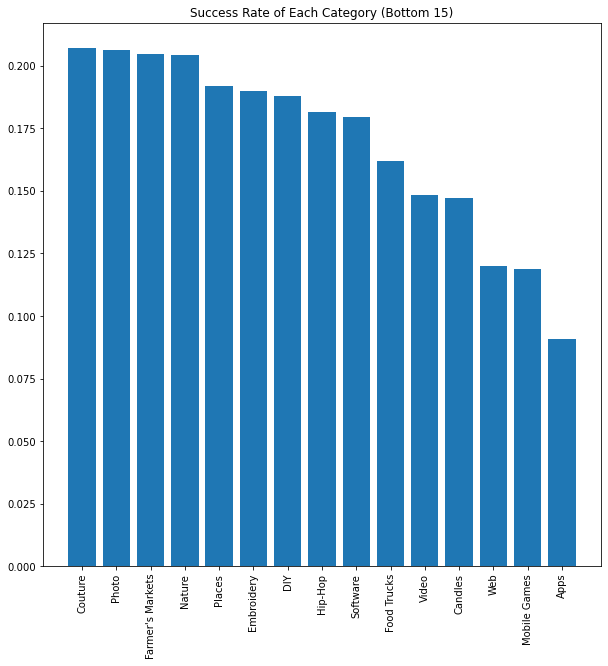

In [28]:
plt.figure(figsize=(10,10))
plt.bar(cat_ordered[-15:], cat_percent_success_ordered[-15:])
plt.xticks(rotation=90)
plt.title("Success Rate of Each Category (Bottom 15)")
plt.show()

#### __So Looks like Campaigns related to the Arts have the Highest success rate and Tech projects have the lowest overall success rate__...

# 2. Is there an optimal time-scale to raise the appropriate funds, or start time?

In [29]:
df.head()

,name,category,main_category,currency,deadline,state,backers,country,usd_pledged_real,usd_goal_real,launched_date,launched_time,launch_time_category
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,failed,0,GB,0.0,1533.95,2015-08-11,12:12:28,Afternoon
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,failed,15,US,2421.0,30000.00,2017-09-02,04:43:57,Night
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,failed,3,US,220.0,45000.00,2013-01-12,00:20:50,Night
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,failed,1,US,1.0,5000.00,2012-03-17,03:24:11,Night
4,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,successful,16,US,1205.0,1000.00,2014-12-01,18:30:44,Evening


### Start Times

First let get a count of the start times

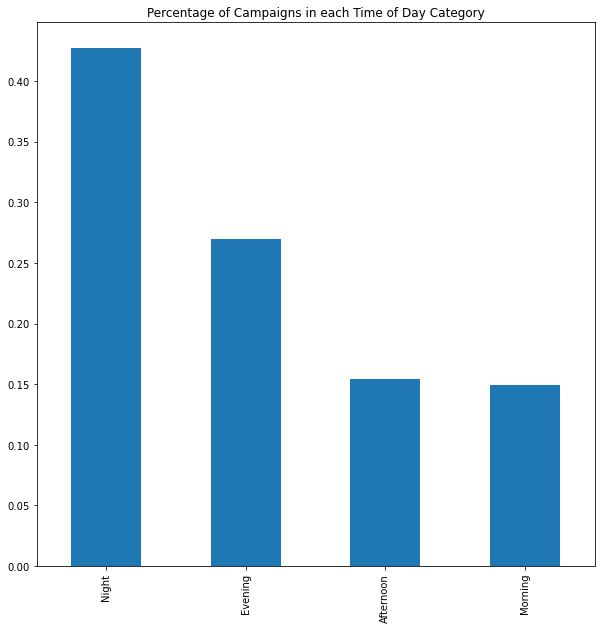

In [30]:
tod_counts = df.launch_time_category.value_counts()
tod_percentages = tod_counts/sum(tod_counts)
tod_percentages.plot(kind='bar', figsize=(10,10))
plt.title("Percentage of Campaigns in each Time of Day Category")
plt.show()

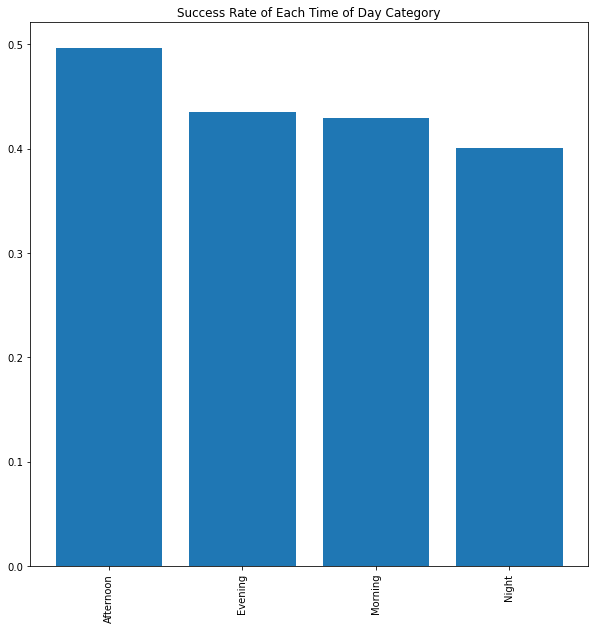

In [31]:
tod_state_counts = df.groupby(['launch_time_category', 'state']).size()

tod_state_percent_success = {}
for time_cat, state in tod_state_counts.keys():
    if time_cat not in tod_state_percent_success:
        failed = tod_state_counts[time_cat]['failed']
        successful = tod_state_counts[time_cat]['successful']
        tod_state_percent_success[time_cat] = successful/(failed + successful)
        
tod_state_percent_success_sorted = sorted(tod_state_percent_success.items(), key=operator.itemgetter(1), reverse=True)
tod_state_ordered, tod_percent_success_ordered = list(zip(*tod_state_percent_success_sorted))

plt.figure(figsize=(10,10))
plt.bar(tod_state_ordered, tod_percent_success_ordered)
plt.xticks(rotation=90)
plt.title("Success Rate of Each Time of Day Category")
plt.show()

Judging from these two pieces of Information, looks as though it is better to launch your campaign in the Afternoon.

### Campaign Duration

In [32]:
from datetime import datetime

df['campaign_duration'] = df["deadline"].astype("datetime64") - df["launched_date"].astype("datetime64")
df['campaign_duration'] = df['campaign_duration'].astype(str).str.strip(' days').astype(int)

In [33]:
df.head()

,name,category,main_category,currency,deadline,state,backers,country,usd_pledged_real,usd_goal_real,launched_date,launched_time,launch_time_category,campaign_duration
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,failed,0,GB,0.0,1533.95,2015-08-11,12:12:28,Afternoon,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,failed,15,US,2421.0,30000.00,2017-09-02,04:43:57,Night,60
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,failed,3,US,220.0,45000.00,2013-01-12,00:20:50,Night,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,failed,1,US,1.0,5000.00,2012-03-17,03:24:11,Night,30
4,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,successful,16,US,1205.0,1000.00,2014-12-01,18:30:44,Evening,20


In [34]:
state_durations = df.groupby(['state', 'campaign_duration']).size()

In [35]:
type(state_durations)

pandas.core.series.Series

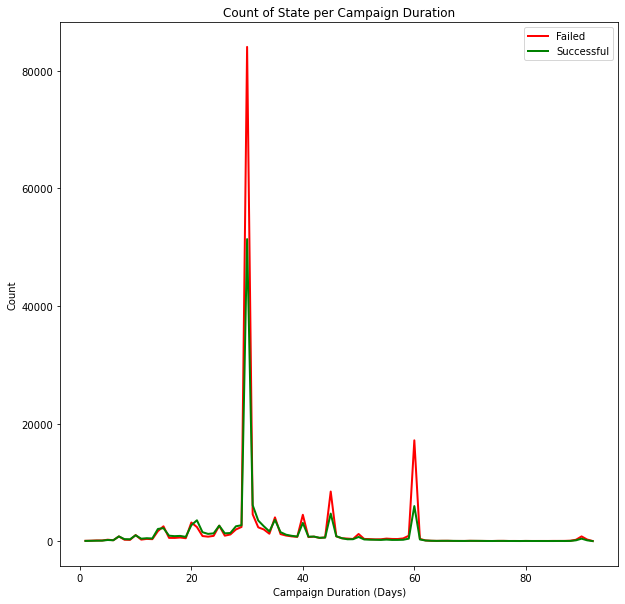

In [36]:
state_durations['failed'].plot(kind='line', figsize=(10,10), label='Failed', c='red', linewidth=2)
state_durations['successful'].plot(kind='line', figsize=(10,10), label='Successful', c='green', linewidth=2)
plt.title("Count of State per Campaign Duration")
plt.xlabel('Campaign Duration (Days)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [50]:
failed_df = df[df.state == 'failed']
success_df = df[df.state == 'successful']

In [51]:
success_dutations_norm

30    0.397463
31    0.047327
60    0.046159
45    0.036219
35    0.028003
        ...   
84    0.000139
83    0.000139
85    0.000139
79    0.000124
92    0.000039
Name: campaign_duration, Length: 92, dtype: float64

In [37]:
df.campaign_duration.mode()

0    30
dtype: int32

In [57]:
failed_df.campaign_duration.mode()

0    30
dtype: int32

In [56]:
success_df.campaign_duration.mode()

0    30
dtype: int32

So seems as though the failed and successful campaigns use very similar durations. Therefore, it doesn't seem as though there is a particularly favourable duration.

Will just double check this using normalised data instead of raw counts

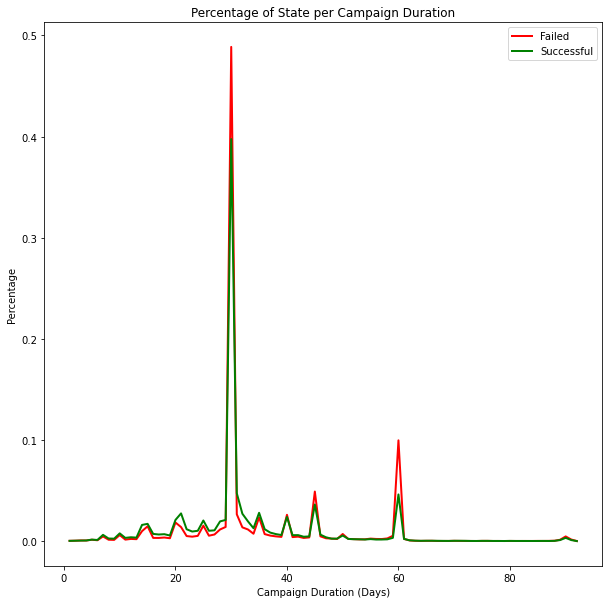

In [63]:
failed_dutations_norm = failed_df.campaign_duration.value_counts(normalize=True).sort_index()
success_dutations_norm = success_df.campaign_duration.value_counts(normalize=True).sort_index()

failed_dutations_norm.plot(kind='line', figsize=(10,10), label='Failed', c='red', linewidth=2)
success_dutations_norm.plot(kind='line', figsize=(10,10), label='Successful', c='green', linewidth=2)
plt.title("Percentage of State per Campaign Duration")
plt.xlabel('Campaign Duration (Days)')
plt.ylabel('Percentage')
plt.legend()
plt.show()

### Now look at Month to determine if there is a best time of year

In [ ]:
df.head()

# 3. Can we predict whether a Kickstarter campaign will be successful or not given this data/Are there any key attributes that make a big impact on the outcome?

Note: maybe use title workd count after removing stop words and punctuation? 

In [85]:
df_ml = df.copy()

I'm going to remove columns that I don't think are relevant

In [67]:
df_ml = df.drop(['backers', 'usd_pledged_real', 'currency', 'launched_time'], axis=1)

In [81]:
df_ml.head()

,name,category,main_category,deadline,state,country,usd_goal_real,launched_date,launch_time_category,campaign_duration,launched_month
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,failed,GB,1533.95,2015-08-11,Afternoon,59,8
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,failed,US,30000.00,2017-09-02,Night,60,9
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,failed,US,45000.00,2013-01-12,Night,45,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,failed,US,5000.00,2012-03-17,Night,30,3
4,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,2014-12-21,successful,US,1000.00,2014-12-01,Evening,20,12


I'll replace out the launched_date and deadline columns with launch_month and launch_day and deadline_month and deadline_day. The years probably wont be relevant..

In [91]:
df_ml['launched_month'] = pd.DatetimeIndex(df_ml['launched_date']).month
df_ml['launched_day'] = pd.DatetimeIndex(df_ml['launched_date']).day
df_ml = df_ml.drop(['launched_date'], axis=1)

df_ml['deadline_month'] = pd.DatetimeIndex(df_ml['deadline']).month
df_ml['deadline_day'] = pd.DatetimeIndex(df_ml['deadline']).day
df_ml = df_ml.drop(['deadline'], axis=1)

In [92]:
df_ml.head()

,name,category,main_category,state,country,usd_goal_real,launch_time_category,campaign_duration,launched_month,launched_day,deadline_month,deadline_day
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,GB,1533.95,Afternoon,59,8,11,10,9
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,US,30000.00,Night,60,9,2,11,1
2,Where is Hank?,Narrative Film,Film & Video,failed,US,45000.00,Night,45,1,12,2,26
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,US,5000.00,Night,30,3,17,4,16
4,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,successful,US,1000.00,Evening,20,12,1,12,21


In [100]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\T-Developer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\T-Developer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
name_tokens = [word_tokenize(text) for text in df_ml.name]

In [112]:
name_tokens_without_sw = []
for sentence in name_tokens[:10]:
    print(sentence)
    name_tokens_without_sw.append([word for word in sentence if not word in stopwords.words() and word not in string.punctuation])

['The', 'Songs', 'of', 'Adelaide', '&', 'Abullah']
['Greeting', 'From', 'Earth', ':', 'ZGAC', 'Arts', 'Capsule', 'For', 'ET']
['Where', 'is', 'Hank', '?']
['ToshiCapital', 'Rekordz', 'Needs', 'Help', 'to', 'Complete', 'Album']
['Support', 'Solar', 'Roasted', 'Coffee', '&', 'Green', 'Energy', '!', 'SolarCoffee.co']
['Chaser', 'Strips', '.', 'Our', 'Strips', 'make', 'Shots', 'their', 'B', '*', 'tch', '!']
['Of', 'Jesus', 'and', 'Madmen']
['Lisa', 'Lim', 'New', 'CD', '!']
['The', 'Cottage', 'Market']
['Tombstone', ':', 'Old', 'West', 'tabletop', 'game', 'and', 'miniatures', 'in', '32mm', '.']
